In [5]:
pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/af/f3/fb27b3b902fc759bbca3f9d0336c48069c3022e57552c4b0095d997c7ea8/matplotlib-3.8.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/2c/8e/656f8e7cd316aa68d9824744773e90dbd71f847429d10c82001e927480a2/contourpy-1.1.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/49/ba/ebe5599acf47371393191091ae95fca08eb6f12fd151b52c8dbebb990d25/fonttools-4.43.1-cp311-cp311-macosx_10_9_universal2.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Obtaining dependency 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
from nuprobe.inputs import NuSystem, create_U_PMNS, create_alpha
from nuprobe.probability import nuprobe
from nuprobe.params import theta12n, theta23n, theta13n, delta13n, m1n, m2n, m3n
from nuprobe.params import theta12i, theta23i, theta13i, delta13i, m1i, m2i, m3i

In [2]:
class parameters:
    def __init__ (self, th12, th13, th23, del_cp):
        self.th12 = th12
        self.th13 = th13
        self.th23 = th23
        self.del_cp = del_cp
        self.entries()
        
    def entries(self):
        s12 = np.sin(self.th12)
        s13 = np.sin(self.th13)
        s23 = np.sin(self.th23)
        c12 = np.cos(self.th12)
        c13 = np.cos(self.th13)
        c23 = np.cos(self.th23)
        self.U11 = c12*c13
        self.U21 = -s12*c23 - c12*s13*s23*np.exp(1j*self.del_cp)
        self.U31 = s12*s23 - c12*c23*s13*np.exp(1j*self.del_cp)
        self.U12 = s12*c13
        self.U22 = c12*c23 - s12*s13*s23*np.exp(1j*self.del_cp)
        self.U32 = -c12*s23 - s12*c23*s13*np.exp(1j*self.del_cp)
        self.U13 = s13*np.exp(-1j*self.del_cp)
        self.U23 = s23*c13
        self.U33 = c13*c23

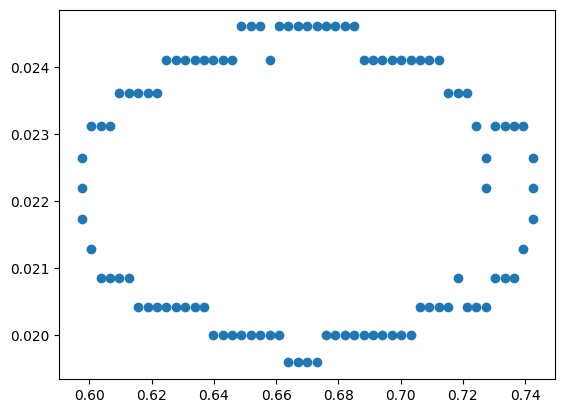

In [3]:
dataU11U12 = np.loadtxt(f"Ue1Ue2.csv", delimiter=',')
dataU11U12small = np.loadtxt(f"Ue1Ue2_smaller.csv", delimiter = ",")
dataU11U13 = np.loadtxt(f"Ue1Ue3.csv", delimiter=',')

U11_1 = dataU11U12[:, 0]
U12_1 = dataU11U12[:, 1]
U11_1s = dataU11U12small[:, 0]
U12_1s = dataU11U12small[:, 1]
U11_2 = dataU11U13[:, 0]
U13_1 = dataU11U13[:, 1]
plt.scatter(U11_2, U13_1)

In [4]:
N1N2 = []
U11U12 = []
U11U13 = []
U12U13 = []
for th12 in np.linspace(0.5465, 0.6239, 50):
    for th13 in np.linspace(0.1429, 0.1551, 50):
        for th23 in np.linspace(0.6912, 0.9058, 50):
            for del_cp in np.linspace(1.885, 7.0511, 50):
                p = parameters(th12, th13, th23, del_cp)
                U11U12.append((abs(p.U11)**2, abs(p.U12)**2))
        
for th12 in np.linspace(0.5465, 0.6239, 50):
    for th13 in np.linspace(0.1429, 0.1551, 50):
        for th23 in np.linspace(0.6912, 0.9058, 50):
            for del_cp in np.linspace(1.885, 7.0511, 50):
                p = parameters(th12, th13, th23, del_cp)
                U11U13.append((abs(p.U11)**2, abs(p.U13)**2))

for th12 in np.linspace(0.5465, 0.6239, 50):
    for th13 in np.linspace(0.1429, 0.1551, 50):
        for th23 in np.linspace(0.6912, 0.9058, 50):
            for del_cp in np.linspace(1.885, 7.0511, 50):
                p = parameters(th12, th13, th23, del_cp)
                U12U13.append((abs(p.U12)**2, abs(p.U13)**2))

In [5]:
list_U11_1 = []
list_U12_1 = []
list_U11_2 = []
list_U13_1 = []
list_U12_2 = []
list_U13_2 = []
for (U11, U12) in U11U12:
    list_U11_1.append(U11)
    list_U12_1.append(U12)

for (U11, U13) in U11U13:
    list_U11_2.append(U11)
    list_U13_1.append(U13)

for (U12, U13) in U12U13:
    list_U12_2.append(U12)
    list_U13_2.append(U13)

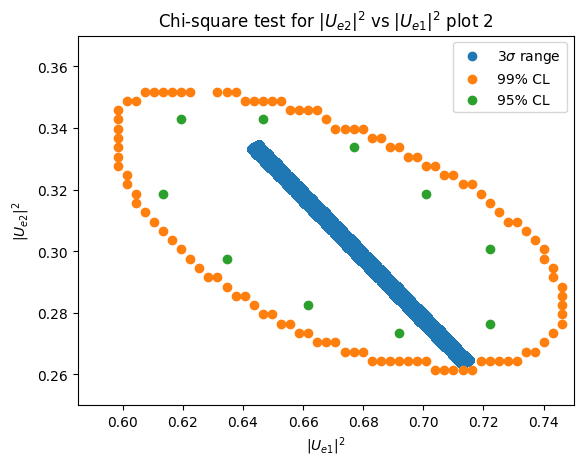

In [8]:
plt.xlim(0.585, 0.75)
plt.ylim(0.25, 0.37)
plt.scatter(list_U11_1, list_U12_1, label = '$3\sigma$ range')
plt.scatter(U11_1, U12_1, label = '99% CL')
plt.scatter(U11_1s, U12_1s, label = '95% CL')
plt.xlabel(r'$|U_{e1}|^2$')
plt.ylabel(r'$|U_{e2}|^2$')
plt.title(r'Chi-square test for $|U_{e2}|^2$ vs $|U_{e1}|^2$ plot 2')
plt.legend()
plt.savefig('Ue1Ue2plot2.jpg', format = 'jpg', dpi = 1200)

(0.01, 0.025)

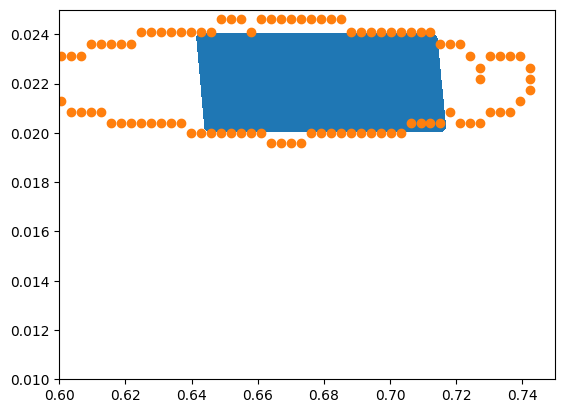

In [28]:
plt.scatter(list_U11_2, list_U13_2)
plt.scatter(U11_2, U13_1)
plt.xlim(0.6, 0.75)
plt.ylim(0.018, 0.025)